In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
movies=pd.read_csv('train_file_prediction.csv',sep=';')
movies.shape

(4499, 48)

In [4]:
liste_colonnes=list(movies.columns)
liste_colonnes.remove('imdb_score')
X=movies[liste_colonnes]
y=movies['imdb_score']

In [5]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(250, input_dim=47, activation='relu'))
    model.add(Dense(100, activation='tanh'))
    #model.add(Dropout(0.3))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy','mean_squared_error'])
    return model

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Epoch 1/20
36/36 [==============================] - 1s 2ms/step - loss: 25.3995 - accuracy: 0.0000e+00 - mean_squared_error: 25.3995
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 1.4099 - accuracy: 0.0000e+00 - mean_squared_error: 1.4099
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 1.3032 - accuracy: 0.0000e+00 - mean_squared_error: 1.3032
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2784 - accuracy: 0.0000e+00 - mean_squared_error: 1.2784
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2788 - accuracy: 0.0000e+00 - mean_squared_error: 1.2788
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2998 - accuracy: 0.0000e+00 - mean_squared_error: 1.2998
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2276 - accuracy: 0.0000e+00 - mean_squared_error: 1.2276
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2235 - 

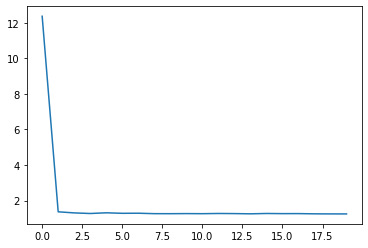

In [7]:
model=baseline_model()

history = model.fit(X, y, batch_size=128, epochs=20)
plt.plot(history.history['mean_squared_error'])

In [10]:
y_pred = model.predict(X)
y_pred=np.around(y_pred, decimals=2)


In [11]:
from sklearn.metrics import accuracy_score
y_pred

array([[6.88],
       [6.65],
       [6.65],
       ...,
       [6.57],
       [6.57],
       [6.6 ]], dtype=float32)

In [12]:
max(y_pred)

array([6.88], dtype=float32)

In [13]:
min(y_pred)

array([5.16], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

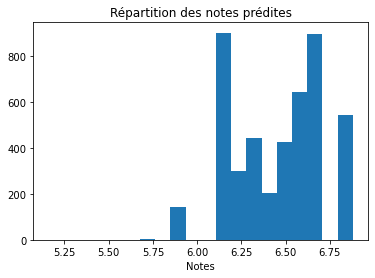

In [14]:
plt.hist(y_pred,bins=20)
plt.title("Répartition des notes prédites")
plt.xlabel("Notes")
plt.show